In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Peter Pandesal,1976
1,Suri,2000
2,Blood and Wine,1996
3,Hrazhesht sahmanagtzits andin,1981
4,Churakhaneun geosheun nalgaega itda,1990


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


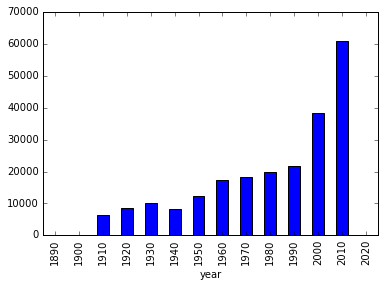

In [6]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

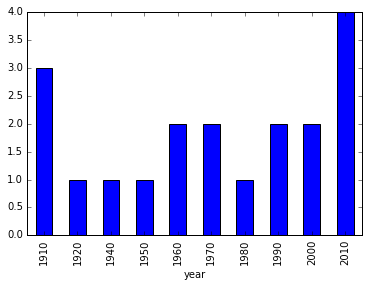

In [7]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [8]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      609
      actress    278
1951  actor      641
      actress    274
1952  actor      594
      actress    287
1953  actor      639
      actress    294
1954  actor      636
      actress    302
1955  actor      617
      actress    272
1956  actor      631
      actress    295
1957  actor      715
      actress    291
1958  actor      703
      actress    278
1959  actor      690
      actress    304
dtype: int64

In [9]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6475
     actress    2875
2.0  actor      4448
     actress    4473
3.0  actor      5486
     actress    3078
4.0  actor      5476
     actress    2793
5.0  actor      5504
     actress    2488
dtype: int64

In [10]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort('n').groupby(['year'])[['n']].max()
c

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,n
year,
1963,15.0
2006,50.0


In [11]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

In [12]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].order()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64